#유튜브 랭킹 시각화

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브_순위.csv to 유튜브_순위.csv


In [3]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자 수,조회 수,비디오 수
0,[음악/댄스/가수],BLACKPINK,"64,000,000","19,003,810,000",371
1,[음악/댄스/가수],HYBE LABELS,"60,300,000","18,713,050,000",654
2,[음악/댄스/가수],BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,[음악/댄스/가수],SMTOWN,"28,500,000","21,870,920,000","3,729"
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [10]:
# 구독자수 --> 구독자수 2(정수)
df['구독자수2'] = df['구독자 수'].apply(lambda x: int(x.replace(',','')))
df.head()

,카테고리,채널명,구독자 수,조회 수,비디오 수,구독자수2
0,[음악/댄스/가수],BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,[음악/댄스/가수],HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,[음악/댄스/가수],BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,[음악/댄스/가수],SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [11]:
def str2int(x):
  return int(x.replace(',',''))

In [48]:
df['조회수2'] = df['조회 수'].apply(str2int)
df.head()

,카테고리,채널명,구독자 수,조회 수,비디오 수,구독자수2,비디오수2,조회수2
0,[음악/댄스/가수],BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371,19003810000
1,[음악/댄스/가수],HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654,18713050000
2,[음악/댄스/가수],BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579,12194960000
3,[음악/댄스/가수],SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729,21870920000
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223,11052880000


- 비디오수 Top20 (채널명, 비디오 수) 막대 그래프

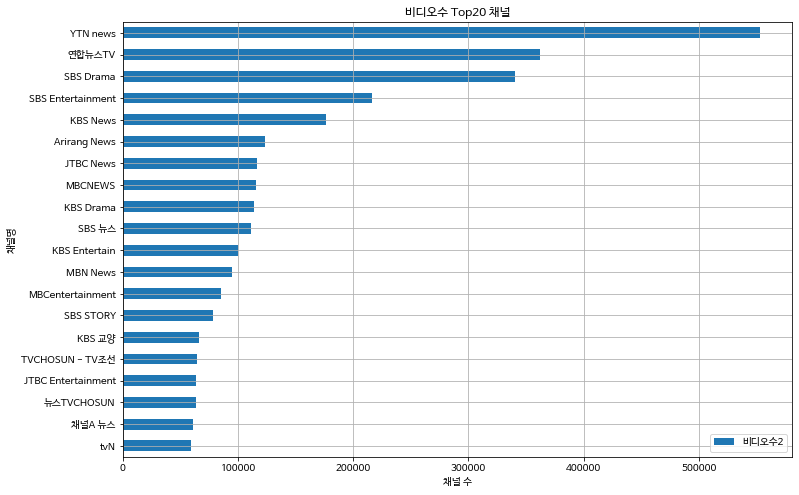

In [41]:
df2 = df[['채널명','비디오수2']].sort_values(by='비디오수2',ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh',grid=True, figsize=(12,8))
plt.title('비디오수 Top20 채널')
plt.xlabel('채널 수')
plt.show()

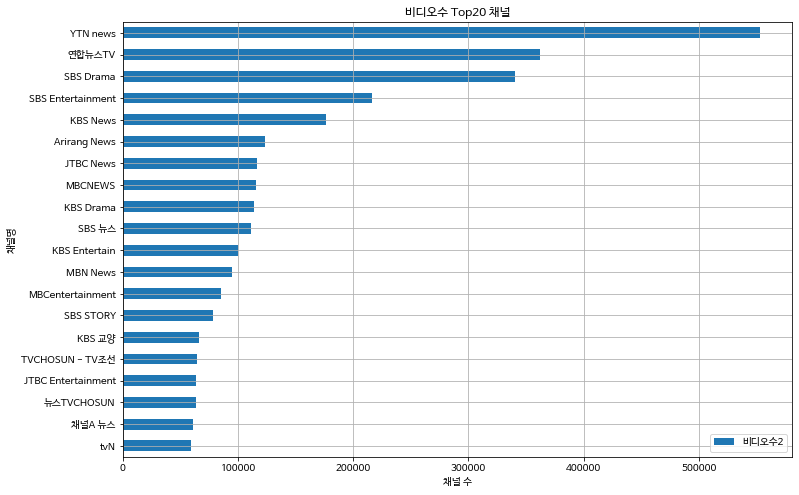

In [43]:
df2 = df[['채널명','비디오수2']].sort_values(by='비디오수2',ascending=False)
df2.index = df2['채널명']
df2.head(20).sort_values(by='비디오수2').plot(kind='barh',grid=True, figsize=(12,8))
plt.title('비디오수 Top20 채널')
plt.xlabel('채널 수')
plt.show()

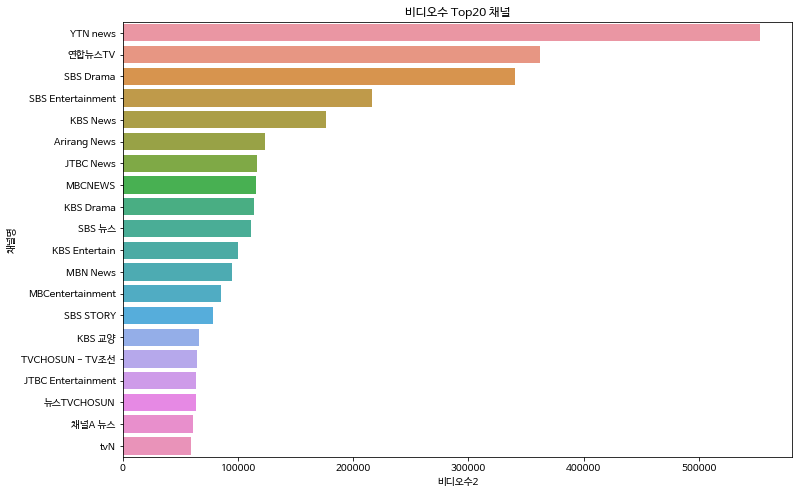

In [47]:
import seaborn as sns
df2 = df[['채널명','비디오수2']].sort_values(by='비디오수2',ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='비디오수2', data=df2.head(20))
plt.title('비디오수 Top20 채널')
plt.show()

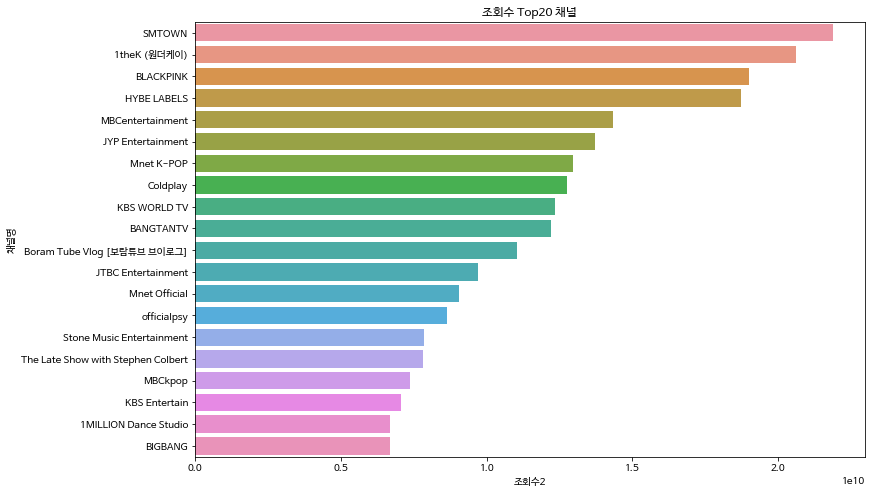

In [49]:
df2 = df[['채널명','조회수2']].sort_values(by='조회수2',ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='조회수2', data=df2.head(20))
plt.title('조회수 Top20 채널')
plt.show()

- 카테고리별 채널수 분포

In [56]:
d3 = df.카테고리.value_counts().to_frame()

In [54]:
d3 = df[['카테고리','채널명']].groupby('카테고리').count()

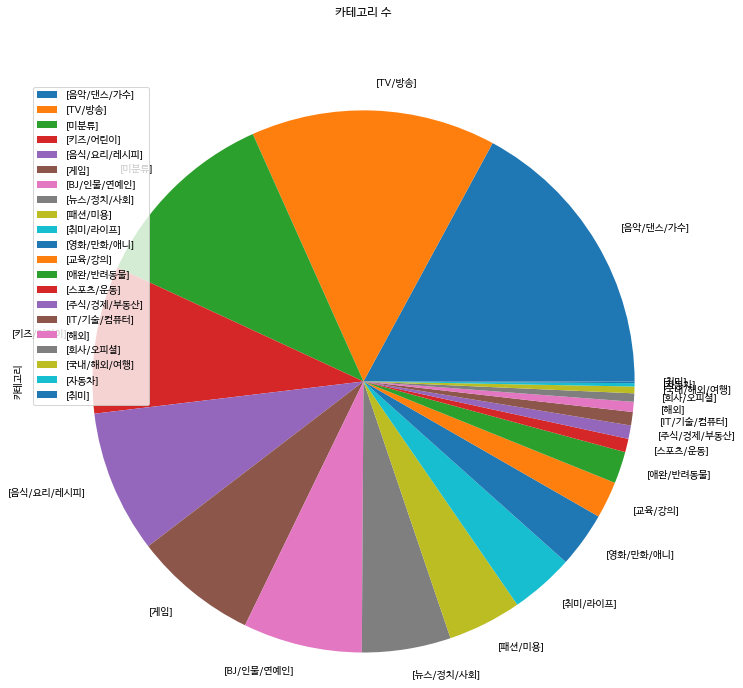

In [72]:
d3.plot.pie(subplots=True,figsize=(12,11))
plt.title('카테고리 수',y=1.1)
plt.axis('equal')
plt.show()

-카테고리별 구독자 수 합계 시각화

In [89]:
d4 = df[['카테고리','구독자수2']].groupby('카테고리').agg(['count','sum'])  
d4.columns = ['채널수','구독자수_합계']
d4.sort_values(by='구독자수_합계', ascending=False,inplace=True)
d4

,채널수,구독자수_합계
카테고리,,
[음악/댄스/가수],171,674180000
[키즈/어린이],88,257740000
[TV/방송],146,229720000
[음식/요리/레시피],85,180570000
[미분류],114,143340000
[BJ/인물/연예인],71,97560000
[뉴스/정치/사회],53,71020000
[게임],74,67170000
[취미/라이프],38,47890000


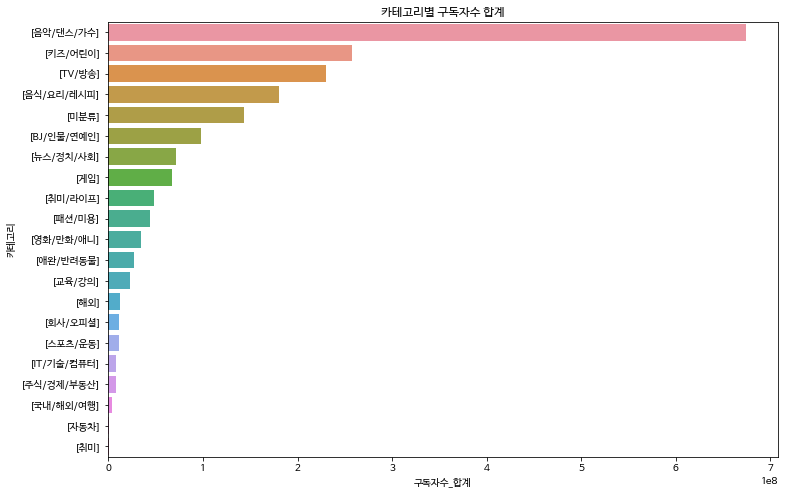

In [90]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수_합계',y=d4.index,data=d4)
plt.title('카테고리별 구독자수 합계')
plt.show()